In [8]:
import pandas as pd

# Load the dataset
weather_df = pd.read_csv('GlobalWeatherRepository.csv')

print("Missing values before cleaning:")
print(weather_df.isnull().sum())

# Fill missing values using forward fill for simplicity (can be adjusted based on your needs)
weather_df.fillna(method='ffill', inplace=True)

# Convert 'last_updated' to datetime
weather_df['last_updated'] = pd.to_datetime(weather_df['last_updated'])

# Ensure numeric fields are in the correct format
weather_df['temperature_celsius'] = pd.to_numeric(weather_df['temperature_celsius'], errors='coerce')
weather_df['humidity'] = pd.to_numeric(weather_df['humidity'], errors='coerce')
weather_df['wind_kph'] = pd.to_numeric(weather_df['wind_kph'], errors='coerce')
weather_df['precip_mm'] = pd.to_numeric(weather_df['precip_mm'], errors='coerce')

# Drop redundant columns (example)
weather_df = weather_df.drop(['temperature_fahrenheit', 'pressure_in', 'visibility_miles'], axis=1)

print("Data cleaning complete.")

Missing values before cleaning:
country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozon

/var/folders/3l/d24nkjvd3jx71m5q9_915qm00000gn/T/ipykernel_96618/2638057707.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_df.fillna(method='ffill', inplace=True)


In [10]:
print(weather_df.describe())
# Specific summaries for key metrics
print(f"Mean Temperature (Celsius): {weather_df['temperature_celsius'].mean()}")
print(f"Max Wind Speed (kph): {weather_df['wind_kph'].max()}")
print(f"Average Humidity: {weather_df['humidity'].mean()}")

           latitude     longitude  last_updated_epoch  \
count  29316.000000  29316.000000        2.931600e+04   
mean      19.132743     21.966014        1.722362e+09   
min      -41.300000   -175.200000        1.715849e+09   
25%        3.750000     -6.840000        1.718978e+09   
50%       17.250000     23.320000        1.722428e+09   
75%       40.400000     49.882200        1.725710e+09   
max       64.150000    179.220000        1.728898e+09   
std       24.486608     65.851780        3.839086e+06   

                     last_updated  temperature_celsius      wind_mph  \
count                       29316         29316.000000  29316.000000   
mean   2024-07-30 20:04:11.862464            25.839613      8.588805   
min           2024-05-16 01:45:00            -8.400000      2.200000   
25%           2024-06-21 16:45:00            22.200000      4.300000   
50%           2024-07-31 17:52:30            26.800000      7.800000   
75%           2024-09-07 14:00:00            30.000000

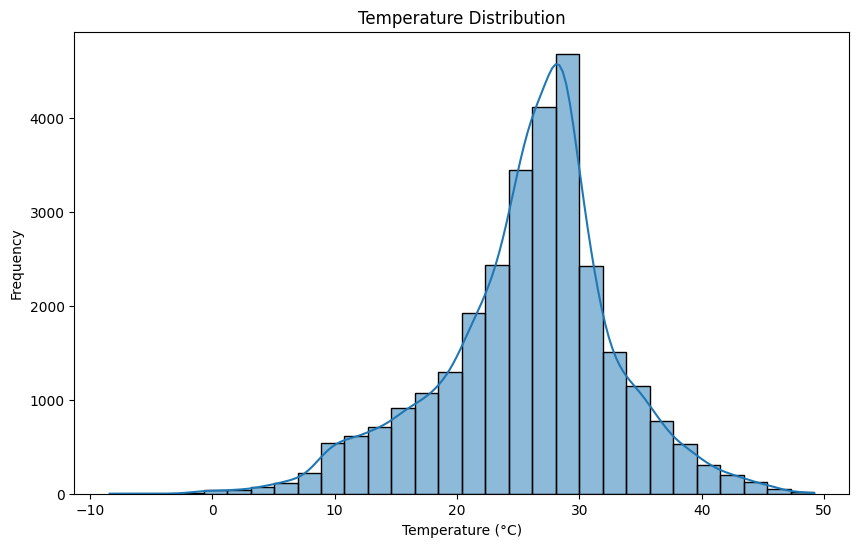

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for temperature distribution
plt.figure(figsize=(10, 6))
sns.histplot(weather_df['temperature_celsius'], bins=30, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

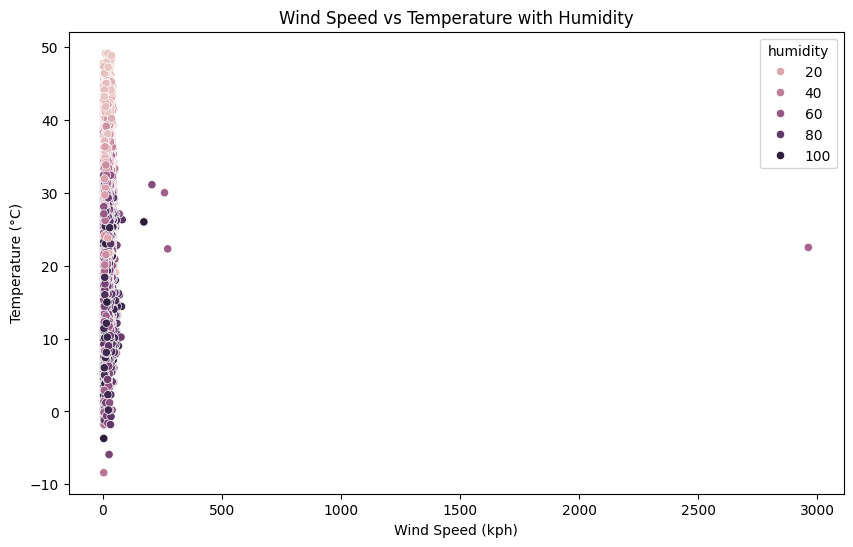

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weather_df, x='wind_kph', y='temperature_celsius', hue='humidity')
plt.title('Wind Speed vs Temperature with Humidity')
plt.xlabel('Wind Speed (kph)')
plt.ylabel('Temperature (°C)')
plt.show()

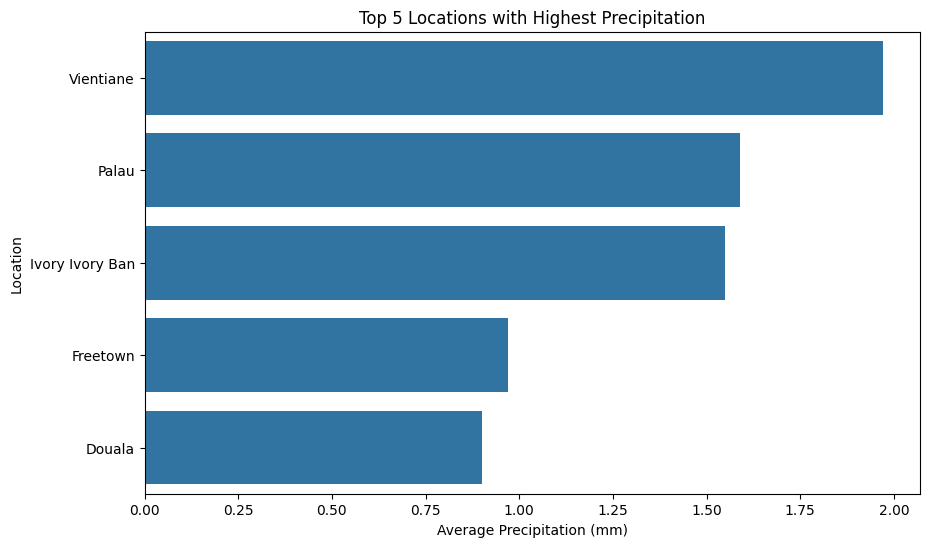

In [14]:
# Group by location and get the average precipitation, then get the top 5
top_precipitation = weather_df.groupby('location_name')['precip_mm'].mean().nlargest(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_precipitation.values, y=top_precipitation.index)
plt.title('Top 5 Locations with Highest Precipitation')
plt.xlabel('Average Precipitation (mm)')
plt.ylabel('Location')
plt.show()

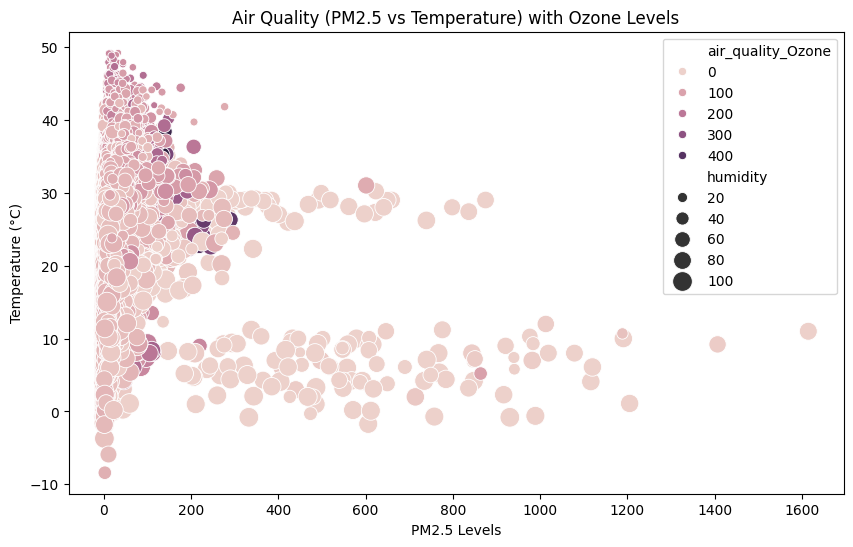

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weather_df, x='air_quality_PM2.5', y='temperature_celsius', hue='air_quality_Ozone', size='humidity', sizes=(20, 200))
plt.title('Air Quality (PM2.5 vs Temperature) with Ozone Levels')
plt.xlabel('PM2.5 Levels')
plt.ylabel('Temperature (°C)')
plt.show()

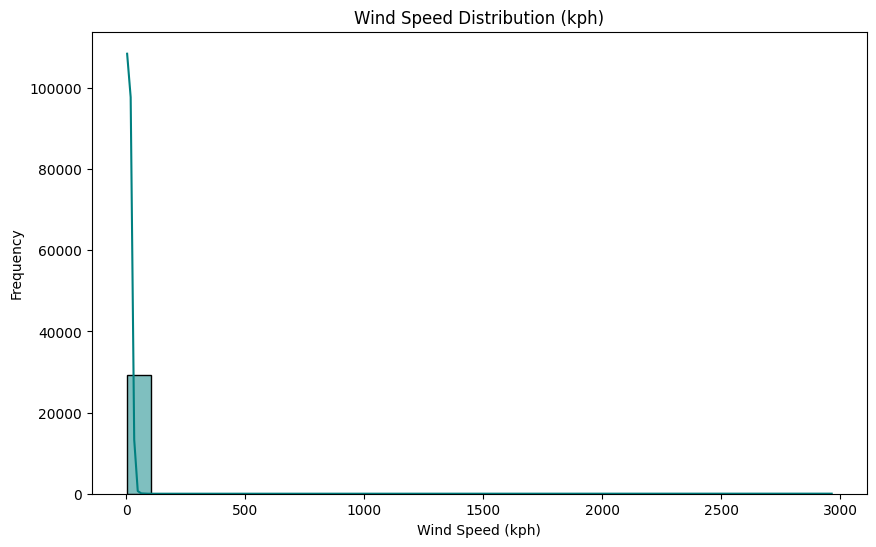

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(weather_df['wind_kph'], bins=30, kde=True, color='teal')
plt.title('Wind Speed Distribution (kph)')
plt.xlabel('Wind Speed (kph)')
plt.ylabel('Frequency')
plt.show()

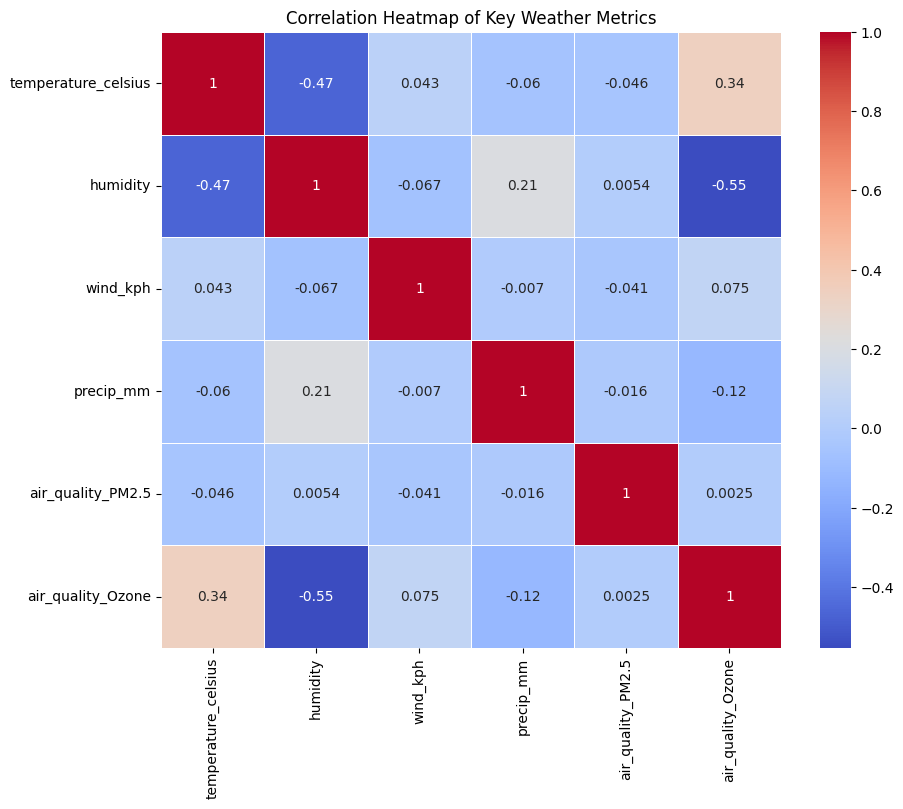

In [19]:
# Select key metrics for correlation analysis
key_metrics = weather_df[['temperature_celsius', 'humidity', 'wind_kph', 'precip_mm', 'air_quality_PM2.5', 'air_quality_Ozone']]

plt.figure(figsize=(10, 8))
sns.heatmap(key_metrics.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Key Weather Metrics')
plt.show()